<a href="https://colab.research.google.com/github/cinnamonrom/DS_I/blob/main/Visualizaci%C3%B3n%2BLibrandi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hockey sobre hielo**

El dataset selccionado contiene estadísticas de equipos en partidos de hockey sobre hielo. Cada fila representa las estadisticas de un juego en especifíco.
Se utilizará este dataset para realizar una análisis descriptivo y predictivo del rendimiento de los equipos en funcion de sus estadísticas de juego.

Dataset obtenido desde Github: Forked from Forrestino/Datasets-potenciales


**Hipótesis:**
Aquellos equipos que bloquean más tiros, tienden a tener una mejor defensa y bajan las probabilidades de recibir goles.

Para ratificar esta hipótesis nos centraremos en investigar la relación entre la cantidad de bloqueos y los goles recibidos por el equipo (usando los goles hechos por el equipo contrario) Esto puede ayudar a determinar si los equipos con más tiros bloqueados permiten menos goles, lo que conduce a un mejor.

**Diccionario de Variables:**

game_id: ID único del partido.

team_id: ID único del equipo que jugó el partido.

HoA: Indica si el equipo jugó en casa ("home") o fuera de casa ("away").

won: Indica si el equipo ganó el partido (True/False).

settled_in: Resultado final del partido (si fue en tiempo regular "REG", tiempo extra "OT", o shootout).

head_coach: Nombre del entrenador del equipo.

goals: Número de goles anotados por el equipo.

shots: Número de tiros realizados por el equipo.

hits: Número de golpes (contactos físicos) realizados.

pim: Penalty in Minutes (minutos de penalización).

powerPlayOpportunities: Oportunidades de jugar en power play (situaciones donde el equipo tiene ventaja numérica debido a una penalización del otro equipo).

powerPlayGoals: Goles anotados en power play.

faceOffWinPercentage: Porcentaje de cara a cara ganados (face-offs).

giveaways: Pérdidas de posesión (giveaways) cometidas.

takeaways: Recuperaciones de posesión (takeaways) realizadas.

blocked: Disparos bloqueados por el equipo.

startRinkSide: Lado del campo donde el equipo comenzó.


In [38]:
#importo todas las librerias que nvoy a usar y cargo el dataset#
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/cinnamonrom/DS_I/refs/heads/main/game_teams_stats.csv'
df = pd.read_csv(url)


In [39]:
df=pd.read_csv('https://raw.githubusercontent.com/cinnamonrom/DS_I/refs/heads/main/game_teams_stats.csv')
df.head()


,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [40]:
# prompt: Using dataframe df: describe().round(2)

# Calculate descriptive statistics and round to 2 decimal places
df.describe().round(2)


,game_id,team_id,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked
count,5.261000e+04,52610.00,52602.00,52602.00,47682.00,52602.00,52602.00,52602.00,30462.00,47682.00,47682.00,47682.00
mean,2.010765e+09,16.88,2.78,29.93,21.13,11.75,3.69,0.67,49.97,8.83,6.75,13.32
std,6.073510e+06,11.20,1.66,6.90,9.24,9.03,1.87,0.81,7.33,5.48,4.14,5.58
min,2.000020e+09,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.006020e+09,8.00,2.00,25.00,15.00,6.00,2.00,0.00,45.20,5.00,4.00,10.00
50%,2.011021e+09,16.00,3.00,30.00,20.00,10.00,3.00,0.00,50.00,8.00,6.00,13.00
75%,2.016030e+09,24.00,4.00,34.00,27.00,15.00,5.00,1.00,54.80,12.00,9.00,17.00
max,2.019041e+09,90.00,12.00,88.00,80.00,213.00,16.00,7.00,79.20,52.00,40.00,62.00


In [41]:
# prompt: data.shape

df.shape


(52610, 17)

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

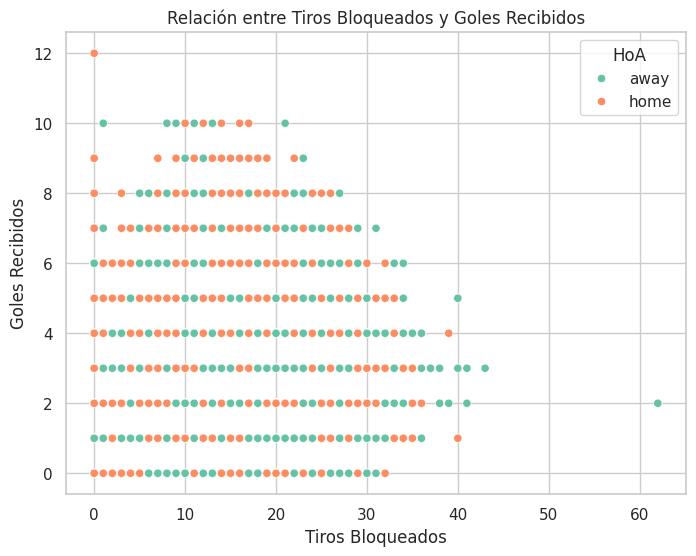

In [86]:
#PRIMER GRAFICO:  DE DISPERSION#

#ESTILO VISUAL#
sns.set(style="whitegrid")
data_defense = df [['blocked', 'goals', 'HoA']].dropna()
palette=sns.color_palette("Blues",3)

plt.figure(figsize=(8,6))
sns.scatterplot(x='blocked', y='goals', data=data_defense, hue='HoA', palette='Set2')
plt.title('Relación entre Tiros Bloqueados y Goles Recibidos')

plt.xlabel('Tiros Bloqueados')
plt.ylabel('Goles Recibidos')
plt.show()


En este primer gráfico en el eje X se representan losla cantidad de tiros que fueron bloqueados por el equipo en un psartido, dejandonos entrever que a una mayor cantidad de bloqueos existe una defensa mas sólida. En el eje Y representamos los goles recibidos en el mismo partido, indicando que un mejor desempeño defensivo es igual a un menor numero de goles recibido. Cada punto representa un partido en especifico siendo los azules los que se jugaron de local y los naranjas de visitante.

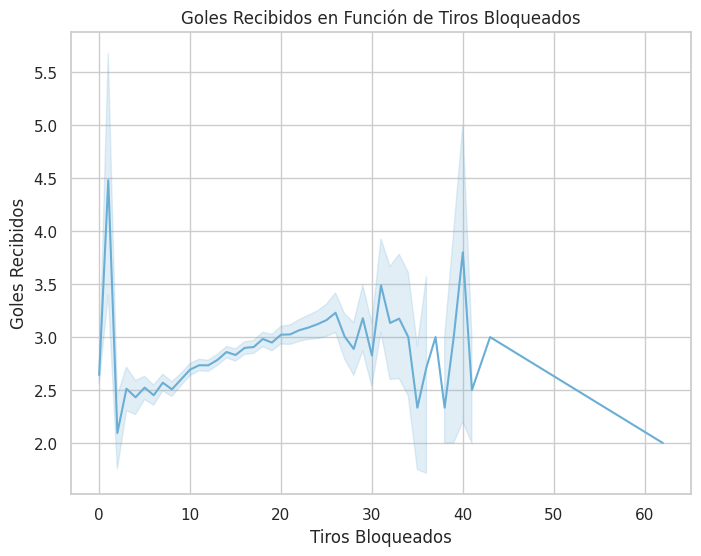

In [14]:
#SEGUNDO GRAFICO: DE LINEA


data_defense = df[['blocked', 'goals']].dropna()
plt.figure(figsize=(8, 6))
sns.lineplot(x='blocked', y='goals', data=data_defense, color=palette[1])
plt.title('Goles Recibidos en Función de Tiros Bloqueados')
plt.xlabel('Tiros Bloqueados')
plt.ylabel('Goles Recibidos')
plt.show()

En este grafico mostramos como los goles recibidos van variando en funcion de los tiros que se bloquean.
La linea representa la tendencia promedio siendo que a medida que los equipos bloquean mas tiros se disminuye la cantidad de goles recibidos. Esto nos demuestra que existe una mejor defensa y a su vez esta mejor defensa decanta en menos goles permidos del equipo oponente.

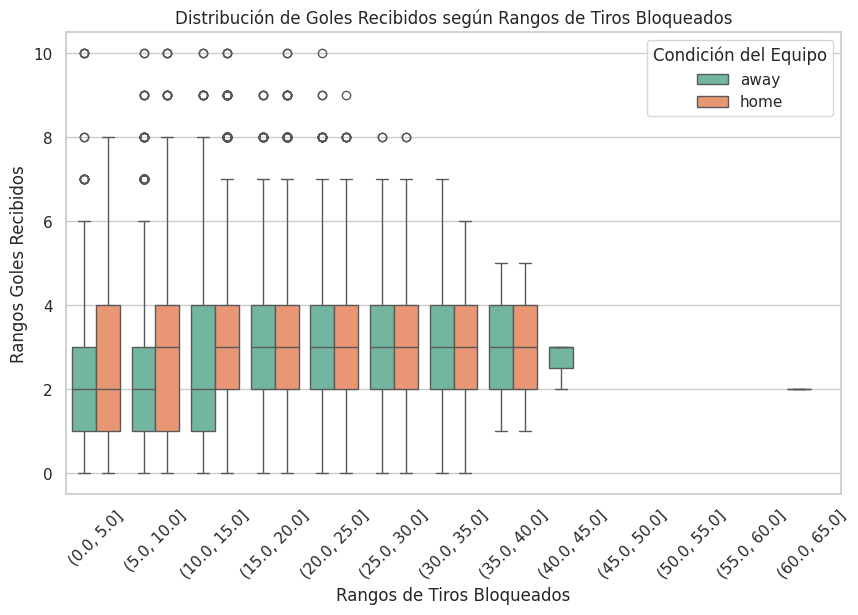

In [85]:
#GRAFICO TRES: BOXPLOT

df = pd.read_csv(url)

#agrupe en rangos los tirps bloquedos para facilitar la visualizacion del eje x evitando la superposicion de etiquetas.

df['blocked_bins'] = pd.cut(df['blocked'], bins=np.arange(0,df['blocked'].max()+5,5))

# para este grafico tambien decidi usar otro tamaño para que la visualizacion
# ya que la cantidad de informacion lo ameritaba y se difencio a los equipos por
# condicion

plt.figure(figsize=(10, 6))
sns.boxplot(x='blocked_bins', y='goals', data=df, hue='HoA', palette='Set2')
plt.title('Distribución de Goles Recibidos según Rangos de Tiros Bloqueados')
plt.xlabel('Rangos de Tiros Bloqueados')
plt.ylabel('Rangos Goles Recibidos')
plt.xticks(rotation=45)
plt.legend(title='Condición del Equipo')
plt.show()


Es este grafico relacionamos los tiros bloquedaos (blocked_bins) y los goles recibidos (goals),. Cada Caja esta representado la distribición de los goles recibidos para un rango específico de tiros bloqueados. Donde:
La linea dentro de cada caja nos indica la *mediana* de los goles recibidos en ese grupo de tiros bloqueados.
La parte inferios y superior de cada caja represntan el primer (Q1) y tercer cuartil (Q3), evidenciando la depresión de los datos.
Los *bigotes* se extienden desde las cajas y representan el rango de los valos atípicos lo que nos indica el rendimiento defensivo de los equipos.

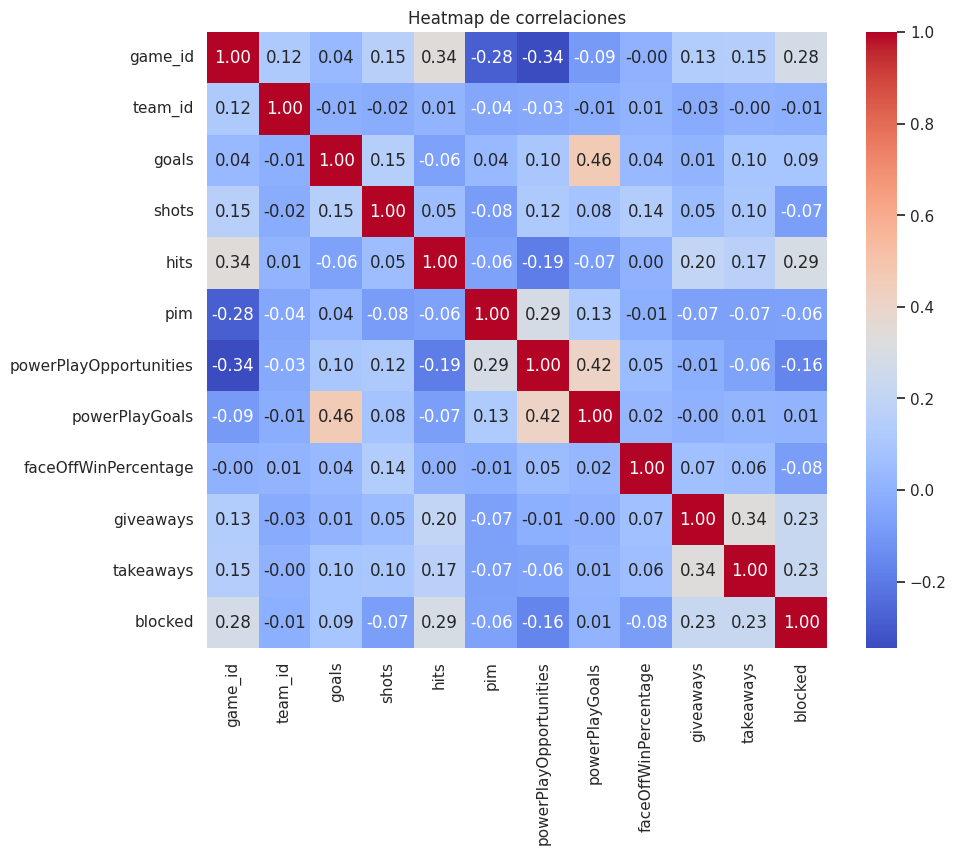

In [55]:
#GRAFICO CUATRO HEATMAP DE CORRELACIONES

#Cargo el dataset y filtro solo columnas numericas
df = pd.read_csv(url)
numeric_df = df.select_dtypes(include='number')

#Calculo la matriz de correlación

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de correlaciones')
plt.show()



Este grafico nos ayuda a indentificar la relacion entre diferentes variables de nuestro dataset, los colores cálidos representado por el rojo en este caso nos indican una relacion positiva, cuando la variable aumenta, la otra tambien tiende a aumentar.
Los coleres frios, azul, indican todo lo controrio, cuando una variable aumenta la otra disminuye.
Los neutros, representados por el blanco indican la ausencia de relacion entre variables.

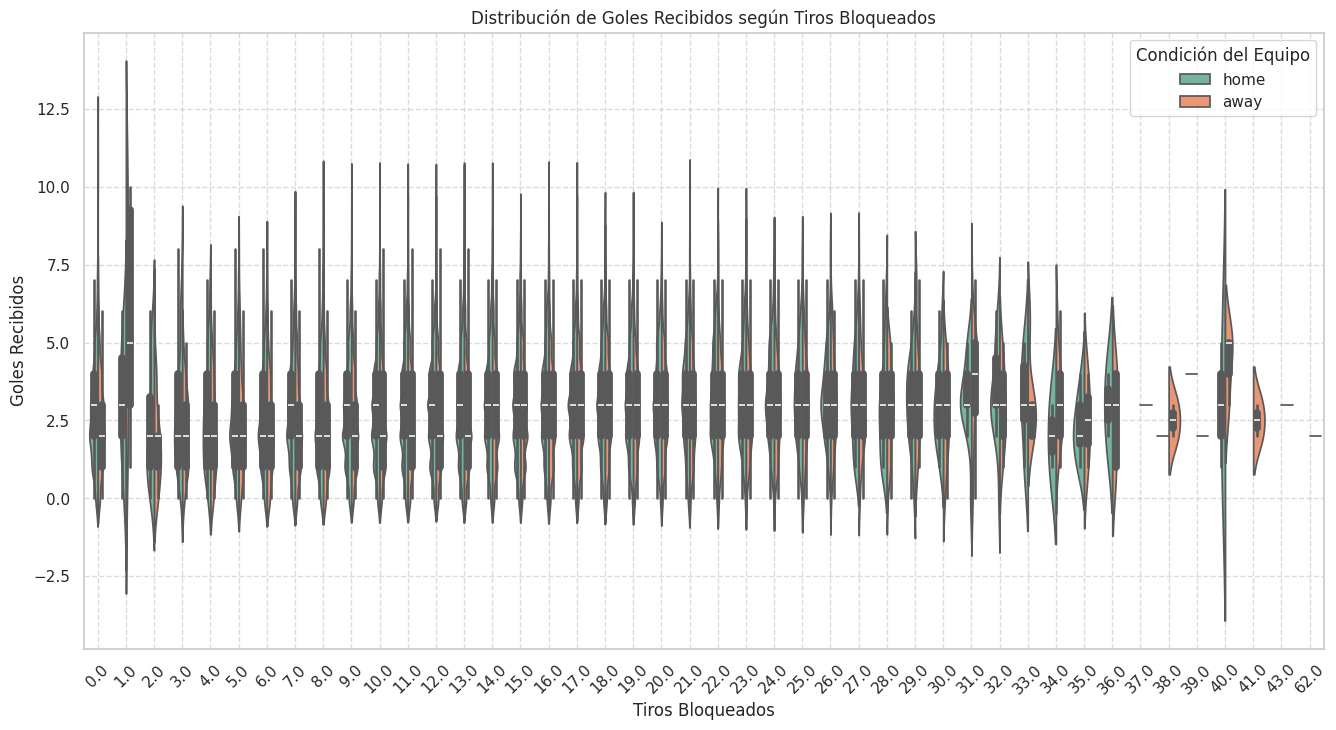

In [75]:
#GRAFICO CINCO: VIOLIN PLOT

plt.figure(figsize=(16, 8))
violin_plot = sns.violinplot(x='blocked', y='goals', data=df, hue= 'HoA', palette='Set2', split=True)
for artist in violin_plot.artists:
  artist.set_alpha(0.2)
plt.title('Distribución de Goles Recibidos según Tiros Bloqueados')
plt.xlabel('Tiros Bloqueados')
plt.ylabel('Goles Recibidos')
plt.xticks(rotation=45)
plt.legend(title='Condición del Equipo')
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

El grafico nos muestra como se distribuyen los goles recibidos por los equipos en ralacion con la cantidad de tiros bloqueados. Cada uno de los "violines" esta representando a un grupo: uno pra los equipos que juegan de local y otro para los que juegan de visatantes.
Los sectores mas anchos, nos muestran que mas equipos recibieron esa cantidad de goles

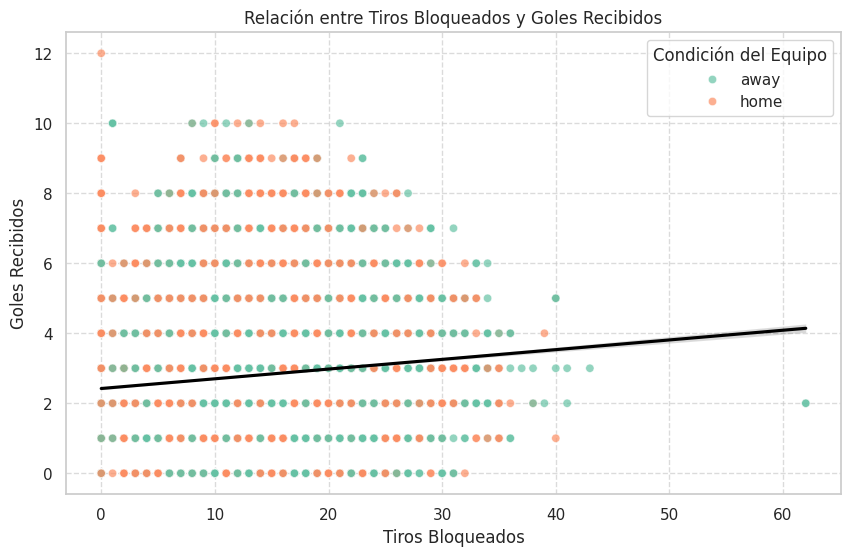

In [82]:
#GRAFICO SEIS: REGPLOT O DE REGRESIÓN

plt.figure(figsize=(10, 6))
sns.scatterplot(x='blocked', y='goals', data=df, hue='HoA', palette='Set2', alpha=0.7)
sns.regplot(x='blocked', y='goals', data=df, scatter=False, color='black', line_kws={'label':'Línea de Regresión'})

plt.title('Relación entre Tiros Bloqueados y Goles Recibidos')
plt.xlabel('Tiros Bloqueados')
plt.ylabel('Goles Recibidos')

plt.legend(title='Condición del Equipo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Este grafico nos permite observar la relación entre los tiros bloqueados y los goles recibidos, asi como la diferencia de equipos locales y visitantes. Donde en cada punto vemosun equipo en un partido especifico, siendo los verdes los visitantes y naranjas los locales. La línea de regresión negra indica la tendencia general en los datos. Una pendiente descendente de la línea sugiere que a medida que aumenta el número de tiros bloqueados, los goles recibidos tienden a disminuir.
Esto respalda la hipótesis de que un mayor número de tiros bloqueados está asociado con una mejor defensa, lo que a su vez resulta en menos goles convertidos.